# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
artist_data = pd.read_csv("../data/lastfm/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [52]:
artist_dict=artist_data[['id','name']].set_index('id').to_dict(orient='records');artist_dict[1]

{'name': 'Diary of Dreams'}

In [3]:
user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
tag_artist_data = pd.read_csv("../data/lastfm/user_taggedartists.dat", sep="\t")
tag_artist_data.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [112]:
tag_artist_data[tag_artist_data.userID==2]

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009
5,2,63,13,1,4,2009
6,2,63,14,1,4,2009
7,2,63,23,1,4,2009
8,2,63,40,1,4,2009
9,2,73,13,1,4,2009


In [5]:
tag_data = pd.read_csv("../data/lastfm/tags.dat", sep="\t",  encoding='latin-1')
tag_data.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [90]:
genres_dict=tag_data[['tagID','tagValue']].set_index('tagID').to_dict(orient='records');genres_dict[0]

{'tagValue': 'metal'}

In [93]:
genres_dict

[{'tagValue': 'metal'},
 {'tagValue': 'alternative metal'},
 {'tagValue': 'goth rock'},
 {'tagValue': 'black metal'},
 {'tagValue': 'death metal'},
 {'tagValue': 'industrial metal'},
 {'tagValue': 'gothic metal'},
 {'tagValue': 'terror ebm'},
 {'tagValue': 'electro-industrial'},
 {'tagValue': 'harsh ebm'},
 {'tagValue': 'post black metal'},
 {'tagValue': 'aggrotech'},
 {'tagValue': 'chillout'},
 {'tagValue': 'ambient'},
 {'tagValue': 'downtempo'},
 {'tagValue': 'new wave'},
 {'tagValue': 'synth pop'},
 {'tagValue': 'electronic'},
 {'tagValue': "80's"},
 {'tagValue': 'lounge'},
 {'tagValue': 'trip-hop'},
 {'tagValue': 'acid jazz'},
 {'tagValue': 'new age'},
 {'tagValue': 'pop'},
 {'tagValue': '80s'},
 {'tagValue': 'atmospheric'},
 {'tagValue': 'ethereal'},
 {'tagValue': 'deutsch'},
 {'tagValue': 'schlager'},
 {'tagValue': 'german'},
 {'tagValue': 'hi-nrg'},
 {'tagValue': 'avant-garde'},
 {'tagValue': 'experimental'},
 {'tagValue': 'minimal'},
 {'tagValue': 'cyberpunk'},
 {'tagValue': 'c

In [ ]:
friend_data = pd.read_csv("../data/lastfm/user_friends.dat", sep="\t",  encoding='latin-1')
friend_data

## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [25]:
# Vemos los 100 artistas más populares (escuchados por diferentes personas)
artist_pop=user_artist_plays.groupby('artistID').count().sort_values(by=['userID'],ascending=False).reset_index().iloc[0:100,]

In [26]:
artist_pop.head()

,artistID,userID,weight
0,89,611,611
1,289,522,522
2,288,484,484
3,227,480,480
4,300,473,473


In [ ]:
# Usar un diccionario para tener la columna nombre de artista.
#artist_pop['name']= artist_pop.apply(lambda x: artist_pop['artistID'].iloc[x,] )

In [40]:
artist_dict[1]

{'id': 2, 'name': 'Diary of Dreams'}

In [21]:
# Vemos los 100 artistas con más reproducciones
user_artist_plays.groupby('artistID')['weight'].sum().sort_values(ascending=False).reset_index().iloc[0:100,]

,artistID,weight
0,289,2393140
1,72,1301308
2,89,1291387
3,292,1058405
4,498,963449
...,...,...
95,868,95880
96,889,94551
97,331,94501
98,1048,94398


<AxesSubplot:xlabel='weight', ylabel='Probability'>

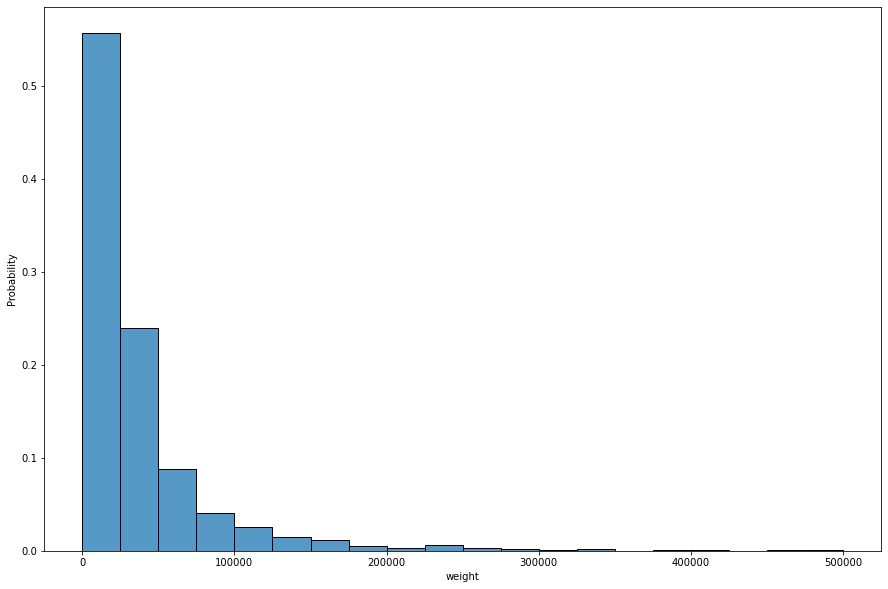

In [114]:
# Vemos la cantidad de reproducciones por usuario
user_rep=user_artist_plays.groupby(['userID'])['weight'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.histplot(user_rep, x='weight',  binwidth=25000, stat='probability')

In [116]:
# Cuantos amigos tiene cada usuario?
friend_q=friend_data.groupby('userID').count()
friend_q.describe()

,friendID
count,1892.000000
mean,13.442918
std,17.312489
min,1.000000
25%,3.000000
50%,6.000000
75%,17.000000
max,119.000000


<AxesSubplot:xlabel='friendID', ylabel='Probability'>

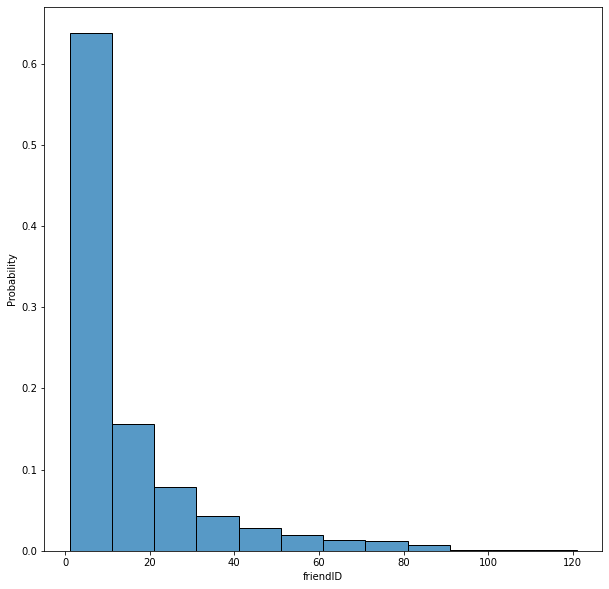

In [111]:
# Graficamos un histograma para ver distribución de cantidad de amigos.
plt.figure(figsize=(10,10))
sns.histplot(friend_q, x='friendID',  binwidth=10, stat='probability')

In [ ]:
# Cuantos generos diferentes tiene cada artista?


## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [ ]:
# Completar...

### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

In [ ]:
# Completar...